Kerrian LE CAILLEC - Thomas MIGLIASSO

## TP Question IV

1. Tracer le prix EDP du call européen dans le modèle de Black & Scholes en fonction de $S_0$,
puis tracer l’écart entre le prix EDP et le prix exact de la formule de Black & Scholes en
fonction de $S_0$.

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import norm, skew, kurtosis
import scipy.stats.stats as st
import matplotlib.pyplot as plt

In [94]:
K = 100
T = 1
r = 0.05
sigma = 0.2
N = 2000
M = 2000
Smax = 150

In [95]:
h = 2 * np.log(Smax) / N
delta_T = T / M

b = -(sigma**2 / h**2 + r)
a = 1 / (2 * h) * (sigma**2 * (1 / h + 1 / 2) - r)
c = 1 / (2 * h) * (sigma**2 * (1 / h - 1 / 2) + r)

In [96]:
def thomas_algorithm(N, a, b, c, d):
    """
    Solves a tridiagonal system Ax = d using the Thomas algorithm.

    Parameters:
    - a: Subdiagonal (length n-1)
    - b: Main diagonal (length n)
    - d: Right-hand side vector (length n)

    Returns:
    - x: Solution vector (length n)
    """
    c_prime = np.zeros(N - 1)
    d_prime = np.zeros(N)
    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]

    for i in range(1, N):
        denom = b[i] - a[i - 1] * c_prime[i - 1]
        if i < N - 1:
            c_prime[i] = c[i] / denom
        d_prime[i] = (d[i] - a[i - 1] * d_prime[i - 1]) / denom

    x = np.zeros(N)
    x[-1] = d_prime[-1]
    for i in range(N - 2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i + 1]

    return x


def tridiagonal_inverse(N, a, b, c):
    """
    Computes the inverse of a tridiagonal matrix using the Thomas algorithm.

    Parameters:
    - a: Subdiagonal
    - b: Main diagonal

    Returns:
    - A_inv: Inverse of the tridiagonal matrix (n x n)
    """
    A_inv = np.zeros((N, N))
    c_list = c * np.ones(N - 1)
    a_list = a * np.ones(N - 1)
    b_list = b * np.ones(N)

    for i in range(N):
        A_inv[:, i] = thomas_algorithm(N, a_list, b_list, c_list, np.eye(N)[:, i])

    return A_inv

def tridiagonal(N, a, b):
    tridiagonal = np.zeros((N, N))
    
    # Fill the main diagonal
    np.fill_diagonal(tridiagonal, a)
    
    # Fill the upper diagonal
    np.fill_diagonal(tridiagonal[0:N-1, 1:N], b)
    
    # Fill the lower diagonal
    np.fill_diagonal(tridiagonal[1:N, 0:N-1], a)
    
    return tridiagonal

In [105]:
U0 = np.maximum(np.exp(np.linspace(-np.log(Smax), np.log(Smax), N)) - K, 0)
euler_matrix = tridiagonal_inverse(N + 1, -delta_T * a, 1 - delta_T * b, -delta_T * c)
Uj = np.concatenate([[0], U0])

In [106]:
for j in range(M):
    Uj[:] = euler_matrix @ Uj
    Uj[0] = 0
    Uj[-1] = Smax - K*np.exp(-r * j*delta_T)

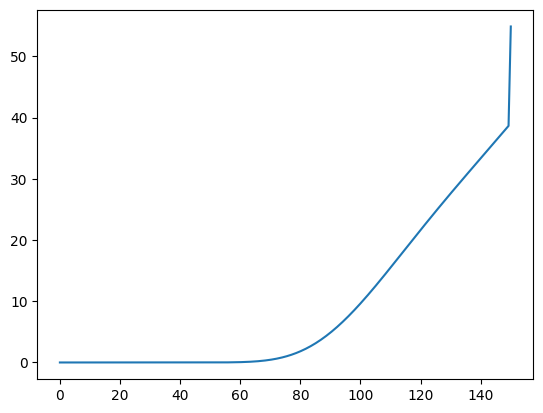

In [110]:
plt.plot(np.exp(np.linspace(-np.log(Smax), np.log(Smax), N)), Uj[1:])

In [108]:
def call_price_black_scholes(K, T, S0, r, sigma):
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

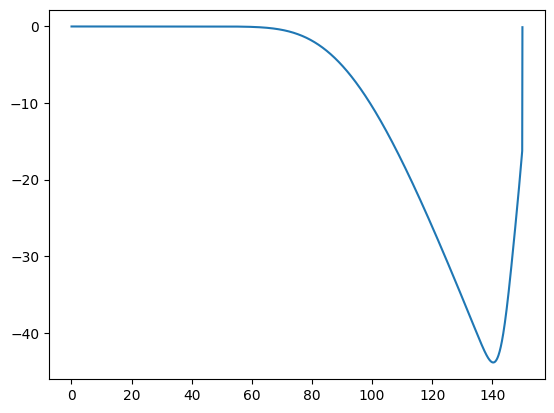

In [109]:
plt.plot(
    np.linspace(np.exp(-np.log(Smax)), Smax, N),
    Uj[1:]
    - call_price_black_scholes(
        K, T, np.linspace(np.exp(-np.log(Smax)), Smax, N), r, sigma
    ),
)
